# Problem Statement:-
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive 
So, we have to work on a project where we have to collect data of flight fares with other features and work to make a model to predict fares of flights. 


# Data Collection:-
I have done data collection part from paytm website using selenium with python.I have collected 7928 rows and saved it into a csv file.

*** Since price/fare is a continuous variable,so predicting fare/price is a regression problem.

In [52]:
## Importing necessary libraries:-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [53]:
## Fetching csv file:
df = pd.read_csv("flight_data_paytm.csv")
df.head()

,Unnamed: 0,flight_name,flight_id,start_time,end_time,travel_time,stops,fare,source,destination
0,0,SpiceJet,SG - 534,22:30,01:15,2h 45m,Non Stop,"8,160",DEL-Delhi,BLR-Bengaluru
1,1,IndiGo,6E - 2036,22:50,01:45,2h 55m,Non Stop,"8,160",DEL-Delhi,BLR-Bengaluru
2,2,Go First,G8 - 275,21:45,03:00,5h 15m,1 stop at Pune,"8,160",DEL-Delhi,BLR-Bengaluru
3,3,Go First,G8 - 2511,10:45,16:05,5h 20m,1 stop at Patna,"8,160",DEL-Delhi,BLR-Bengaluru
4,4,Go First,G8 - 165,10:00,16:05,6h 5m,1 stop at Patna,"8,160",DEL-Delhi,BLR-Bengaluru


In [4]:
## Size of the dataframe
df.shape

(7927, 10)

There are 7927 rows and 10 columns.

In [4]:
## Checking meta data about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   7927 non-null   int64 
 1   flight_name  7927 non-null   object
 2   flight_id    7927 non-null   object
 3   start_time   7927 non-null   object
 4   end_time     7927 non-null   object
 5   travel_time  7927 non-null   object
 6   stops        7927 non-null   object
 7   fare         7927 non-null   object
 8   source       7927 non-null   object
 9   destination  7927 non-null   object
dtypes: int64(1), object(9)
memory usage: 619.4+ KB


So from above result,we can see there is not any null values present in dataset and all features data type are object.

In [5]:
## Again rechecking for null values:
df.isnull().sum()

Unnamed: 0     0
flight_name    0
flight_id      0
start_time     0
end_time       0
travel_time    0
stops          0
fare           0
source         0
destination    0
dtype: int64

There is not any null values present in dataset.

In [6]:
df['flight_name'].value_counts()

Vistara      2533
IndiGo       2275
Air India    1913
Go First      582
SpiceJet      321
Air Asia      303
Name: flight_name, dtype: int64

Most number of flights are from Vistara followed by Indigo and Air India.

In [7]:
df['source'].value_counts()

BOM-Mumbai                1518
BLR-Bengaluru             1086
DEL-Delhi                  921
CU-Kolkata                 724
HYD-Hyderabad              641
MAA-Chennai                384
AMD-Ahmedabad              307
GOI-Goa                    264
GAU-Guwahati               232
PNQ-Pune                   213
PAT-Patna                  191
LKO-Lucknow                188
SXR-Srinagar               181
BBI-Bhubaneshwar           158
JAI-Jaipur                 142
COK-Kochi                  142
VNS-Varanasi               135
IXC-Chandigarh             134
IXB-Bagdogra               103
VTZ-Vishakhapatnam          68
RPR-Raipur                  62
IXR-Ranchi                  48
NAG-Nagpur                  36
IDR-Indore                  12
CJB-Coimbatore              10
IXJ-Jammu                    8
ATQ-Amritsar                 7
TRV-Thiruvananthapuram       6
CCJ-Kozhikode                6
Name: source, dtype: int64

In [9]:
df['destination'].value_counts()

IXC-Chandigarh            501
CU-Kolkata                382
PNQ-Pune                  378
GAU-Guwahati              376
IXR-Ranchi                374
GOI-Goa                   359
VNS-Varanasi              332
DED-Dehradun              330
LKO-Lucknow               325
BBI-Bhubaneshwar          318
ATQ-Amritsar              307
MAA-Chennai               307
JAI-Jaipur                303
CJB-Coimbatore            295
IXB-Bagdogra              290
COK-Kochi                 266
AMD-Ahmedabad             264
PAT-Patna                 252
NAG-Nagpur                237
IDR-Indore                233
IXJ-Jammu                 231
BLR-Bengaluru             228
HYD-Hyderabad             218
TRV-Thiruvananthapuram    216
VTZ-Vishakhapatnam        209
SXR-Srinagar              184
RPR-Raipur                162
CCJ-Kozhikode              50
Name: destination, dtype: int64

In [10]:
df['stops'].value_counts()

1 stop at Delhi                 2802
2 Stops (BOM, DEL)               620
1 stop at Mumbai                 608
Non Stop                         578
1 stop at Bengaluru              532
                                ... 
2 Stops (IDR, RPR)                 1
4 Stops (ISK, AMD, DEL, MAA)       1
4 Stops (IXU, DEL, BLR, HYD)       1
1 stop at Kannur                   1
1 stop at Hubli                    1
Name: stops, Length: 203, dtype: int64

In [11]:
df['travel_time'].value_counts()

8h 30m     46
18h 15m    46
7h 15m     44
22h 40m    44
17h 10m    42
           ..
33h 15m     1
30h 25m     1
36h 40m     1
33h 40m     1
33h 20m     1
Name: travel_time, Length: 397, dtype: int64

# Data Cleaning

In [54]:
## Unnamed: 0 column is nothing but an index so dropping this column.
df.drop('Unnamed: 0',axis=1,inplace = True)

In [13]:
df.head()

,flight_name,flight_id,start_time,end_time,travel_time,stops,fare,source,destination
0,SpiceJet,SG - 534,22:30,01:15,2h 45m,Non Stop,"8,160",DEL-Delhi,BLR-Bengaluru
1,IndiGo,6E - 2036,22:50,01:45,2h 55m,Non Stop,"8,160",DEL-Delhi,BLR-Bengaluru
2,Go First,G8 - 275,21:45,03:00,5h 15m,1 stop at Pune,"8,160",DEL-Delhi,BLR-Bengaluru
3,Go First,G8 - 2511,10:45,16:05,5h 20m,1 stop at Patna,"8,160",DEL-Delhi,BLR-Bengaluru
4,Go First,G8 - 165,10:00,16:05,6h 5m,1 stop at Patna,"8,160",DEL-Delhi,BLR-Bengaluru


In [55]:
## extracting Hour and Minute from start time:-
df['dep_hour'] = pd.DatetimeIndex(df['start_time']).hour
df['dep_minute'] = pd.DatetimeIndex(df['start_time']).minute

In [15]:
df.head()

,flight_name,flight_id,start_time,end_time,travel_time,stops,fare,source,destination,dep_hour,dep_minute
0,SpiceJet,SG - 534,22:30,01:15,2h 45m,Non Stop,"8,160",DEL-Delhi,BLR-Bengaluru,22,30
1,IndiGo,6E - 2036,22:50,01:45,2h 55m,Non Stop,"8,160",DEL-Delhi,BLR-Bengaluru,22,50
2,Go First,G8 - 275,21:45,03:00,5h 15m,1 stop at Pune,"8,160",DEL-Delhi,BLR-Bengaluru,21,45
3,Go First,G8 - 2511,10:45,16:05,5h 20m,1 stop at Patna,"8,160",DEL-Delhi,BLR-Bengaluru,10,45
4,Go First,G8 - 165,10:00,16:05,6h 5m,1 stop at Patna,"8,160",DEL-Delhi,BLR-Bengaluru,10,0


In [56]:
## Extracted dep hour and dep minute, so dropping start_time column
df.drop('start_time',axis=1,inplace = True )

In [17]:
df.head()

,flight_name,flight_id,end_time,travel_time,stops,fare,source,destination,dep_hour,dep_minute
0,SpiceJet,SG - 534,01:15,2h 45m,Non Stop,"8,160",DEL-Delhi,BLR-Bengaluru,22,30
1,IndiGo,6E - 2036,01:45,2h 55m,Non Stop,"8,160",DEL-Delhi,BLR-Bengaluru,22,50
2,Go First,G8 - 275,03:00,5h 15m,1 stop at Pune,"8,160",DEL-Delhi,BLR-Bengaluru,21,45
3,Go First,G8 - 2511,16:05,5h 20m,1 stop at Patna,"8,160",DEL-Delhi,BLR-Bengaluru,10,45
4,Go First,G8 - 165,16:05,6h 5m,1 stop at Patna,"8,160",DEL-Delhi,BLR-Bengaluru,10,0


In [57]:
## Extract arrival hour and arrival minute from end time:
df['arr_hour'] = pd.DatetimeIndex(df['end_time']).hour
df['arr_minute'] = pd.DatetimeIndex(df['end_time']).minute


In [19]:
df.head()

,flight_name,flight_id,end_time,travel_time,stops,fare,source,destination,dep_hour,dep_minute,arr_hour,arr_minute
0,SpiceJet,SG - 534,01:15,2h 45m,Non Stop,"8,160",DEL-Delhi,BLR-Bengaluru,22,30,1,15
1,IndiGo,6E - 2036,01:45,2h 55m,Non Stop,"8,160",DEL-Delhi,BLR-Bengaluru,22,50,1,45
2,Go First,G8 - 275,03:00,5h 15m,1 stop at Pune,"8,160",DEL-Delhi,BLR-Bengaluru,21,45,3,0
3,Go First,G8 - 2511,16:05,5h 20m,1 stop at Patna,"8,160",DEL-Delhi,BLR-Bengaluru,10,45,16,5
4,Go First,G8 - 165,16:05,6h 5m,1 stop at Patna,"8,160",DEL-Delhi,BLR-Bengaluru,10,0,16,5


In [58]:
## Dropping end_time column
df.drop('end_time',axis =1,inplace = True )

In [21]:
df.head()

,flight_name,flight_id,travel_time,stops,fare,source,destination,dep_hour,dep_minute,arr_hour,arr_minute
0,SpiceJet,SG - 534,2h 45m,Non Stop,"8,160",DEL-Delhi,BLR-Bengaluru,22,30,1,15
1,IndiGo,6E - 2036,2h 55m,Non Stop,"8,160",DEL-Delhi,BLR-Bengaluru,22,50,1,45
2,Go First,G8 - 275,5h 15m,1 stop at Pune,"8,160",DEL-Delhi,BLR-Bengaluru,21,45,3,0
3,Go First,G8 - 2511,5h 20m,1 stop at Patna,"8,160",DEL-Delhi,BLR-Bengaluru,10,45,16,5
4,Go First,G8 - 165,6h 5m,1 stop at Patna,"8,160",DEL-Delhi,BLR-Bengaluru,10,0,16,5


In [59]:
## Let us convert travel_time column into Hour and minute format:-
## Creating empty lists to contain hours and minute data
travel_hours =[]
travel_minutes =[]

duration = list(df["travel_time"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+ " 0m"
        else:
            duration[i] = "0h " +duration[i]

for i in range(len(duration)):
    travel_hours.append(int(duration[i].split(sep="h")[0]))
    travel_minutes.append(int(duration[i].split(sep="m")[0].split()[-1]))
    
#print(travel_hours)
#print(travel_minutes)
    


In [60]:
df['travel_hours'] = travel_hours
df['travel_minutes'] = travel_minutes

In [24]:
df.head()

,flight_name,flight_id,travel_time,stops,fare,source,destination,dep_hour,dep_minute,arr_hour,arr_minute,travel_hours,travel_minutes
0,SpiceJet,SG - 534,2h 45m,Non Stop,"8,160",DEL-Delhi,BLR-Bengaluru,22,30,1,15,2,45
1,IndiGo,6E - 2036,2h 55m,Non Stop,"8,160",DEL-Delhi,BLR-Bengaluru,22,50,1,45,2,55
2,Go First,G8 - 275,5h 15m,1 stop at Pune,"8,160",DEL-Delhi,BLR-Bengaluru,21,45,3,0,5,15
3,Go First,G8 - 2511,5h 20m,1 stop at Patna,"8,160",DEL-Delhi,BLR-Bengaluru,10,45,16,5,5,20
4,Go First,G8 - 165,6h 5m,1 stop at Patna,"8,160",DEL-Delhi,BLR-Bengaluru,10,0,16,5,6,5


In [61]:
## let's take only city name from source :-
df['source'] = [i.split("-")[1] for i in df['source']]

In [62]:
## let's take only city name from destination :-

df['destination'] = [i.split("-")[1] for i in df['destination']]

In [30]:
df.head()

,flight_name,flight_id,travel_time,stops,fare,source,destination,dep_hour,dep_minute,arr_hour,arr_minute,travel_hours,travel_minutes
0,SpiceJet,SG - 534,2h 45m,Non Stop,"8,160",Delhi,Bengaluru,22,30,1,15,2,45
1,IndiGo,6E - 2036,2h 55m,Non Stop,"8,160",Delhi,Bengaluru,22,50,1,45,2,55
2,Go First,G8 - 275,5h 15m,1 stop at Pune,"8,160",Delhi,Bengaluru,21,45,3,0,5,15
3,Go First,G8 - 2511,5h 20m,1 stop at Patna,"8,160",Delhi,Bengaluru,10,45,16,5,5,20
4,Go First,G8 - 165,6h 5m,1 stop at Patna,"8,160",Delhi,Bengaluru,10,0,16,5,6,5


In [63]:
## Removing comma drom fare:
df['fare'] = [i.replace(",","") for i in df['fare']]

In [32]:
df.head()

,flight_name,flight_id,travel_time,stops,fare,source,destination,dep_hour,dep_minute,arr_hour,arr_minute,travel_hours,travel_minutes
0,SpiceJet,SG - 534,2h 45m,Non Stop,8160,Delhi,Bengaluru,22,30,1,15,2,45
1,IndiGo,6E - 2036,2h 55m,Non Stop,8160,Delhi,Bengaluru,22,50,1,45,2,55
2,Go First,G8 - 275,5h 15m,1 stop at Pune,8160,Delhi,Bengaluru,21,45,3,0,5,15
3,Go First,G8 - 2511,5h 20m,1 stop at Patna,8160,Delhi,Bengaluru,10,45,16,5,5,20
4,Go First,G8 - 165,6h 5m,1 stop at Patna,8160,Delhi,Bengaluru,10,0,16,5,6,5


In [64]:
## let's put stop in a proper format
df['stops'] = df['stops'].str.lower().apply(lambda X: X.split('stop')[0])
df['stops'] = df['stops'].str.replace('non','0')
df['stops'] = df['stops'].astype('int')


In [44]:
df.head()

,flight_name,flight_id,travel_time,stops,fare,source,destination,dep_hour,dep_minute,arr_hour,arr_minute,travel_hours,travel_minutes
0,SpiceJet,SG - 534,2h 45m,0,8160,Delhi,Bengaluru,22,30,1,15,2,45
1,IndiGo,6E - 2036,2h 55m,0,8160,Delhi,Bengaluru,22,50,1,45,2,55
2,Go First,G8 - 275,5h 15m,1,8160,Delhi,Bengaluru,21,45,3,0,5,15
3,Go First,G8 - 2511,5h 20m,1,8160,Delhi,Bengaluru,10,45,16,5,5,20
4,Go First,G8 - 165,6h 5m,1,8160,Delhi,Bengaluru,10,0,16,5,6,5


In [65]:
## Dropping travel_time as we  already extracted travel hours and minutes
df.drop('travel_time',axis=1,inplace=True)

In [46]:
df.dtypes

flight_name       object
flight_id         object
stops              int32
fare              object
source            object
destination       object
dep_hour           int64
dep_minute         int64
arr_hour           int64
arr_minute         int64
travel_hours       int64
travel_minutes     int64
dtype: object

In [66]:
## Converting fare data type from object to int type
df['fare'] = df['fare'].astype('int')

In [48]:
df['fare'].dtypes

dtype('int32')

# EDA

# Univariate Analysis

In [49]:
categorical_cols = df.select_dtypes(include=['object']).columns  # checking categorcial columns


Index(['flight_name', 'flight_id', 'source', 'destination'], dtype='object')

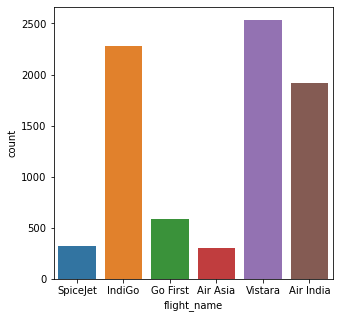

In [51]:
plt.figure(figsize=(5,5))
sns.countplot(df['flight_name'])
plt.show()

Vistara flights are more in counts followed by Indigo and Air India.

<AxesSubplot:ylabel='flight_name'>

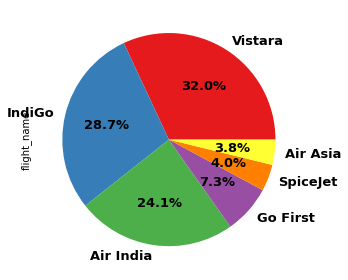

In [92]:
# Pie & count plot of Airline types
df['flight_name'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight' :'bold'})


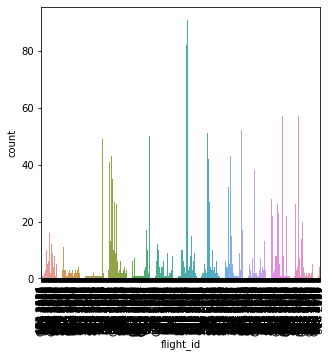

In [52]:
plt.figure(figsize=(5,5))
sns.countplot(df['flight_id'])
plt.xticks(rotation=90)
plt.show()

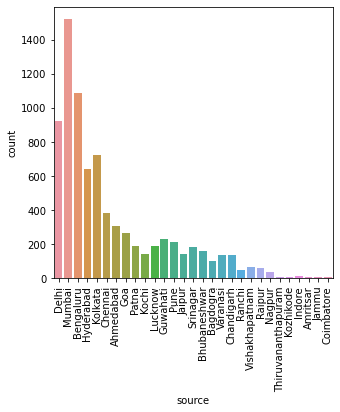

In [53]:
plt.figure(figsize=(5,5))
sns.countplot(df['source'])
plt.xticks(rotation=90)
plt.show()

 Count of Mumbai as source staion is more than any other cities.

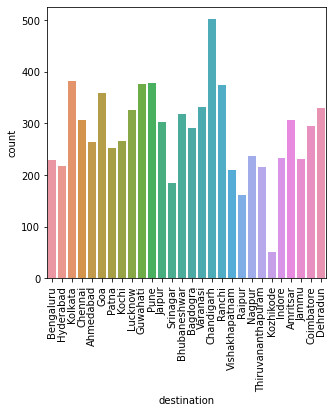

In [54]:
plt.figure(figsize=(5,5))
sns.countplot(df['destination'])
plt.xticks(rotation=90)
plt.show()

 count of Chandigarh as destination is more than any other cities.

In [56]:
numerical_cols = df._get_numeric_data().columns
numerical_cols

Index(['stops', 'fare', 'dep_hour', 'dep_minute', 'arr_hour', 'arr_minute',
       'travel_hours', 'travel_minutes'],
      dtype='object')

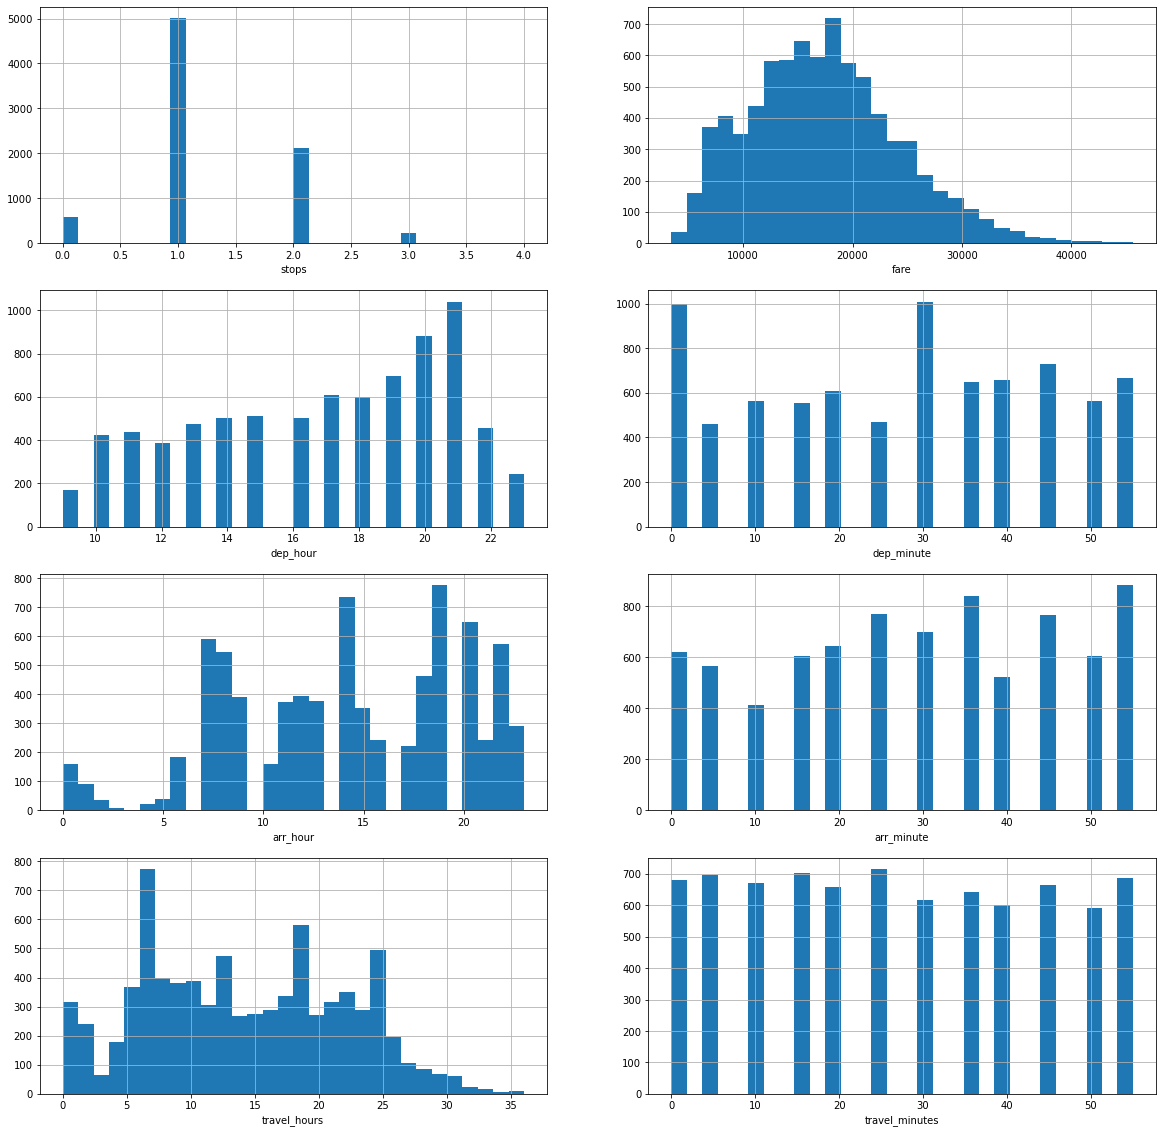

In [62]:
plt.figure(figsize=(20,20))
graph = 1
for i in numerical_cols:
    if graph <= 8:
        plt.subplot(4,2,graph)
        df[i].hist(bins = 30 )
        plt.xlabel(i)
        graph += 1
        
plt.show()    

## Observations:
-> Most of stops are 1 stop followed by 2nd stop.
-> Most of fare ranges between 10,000 to 25,000 rs.

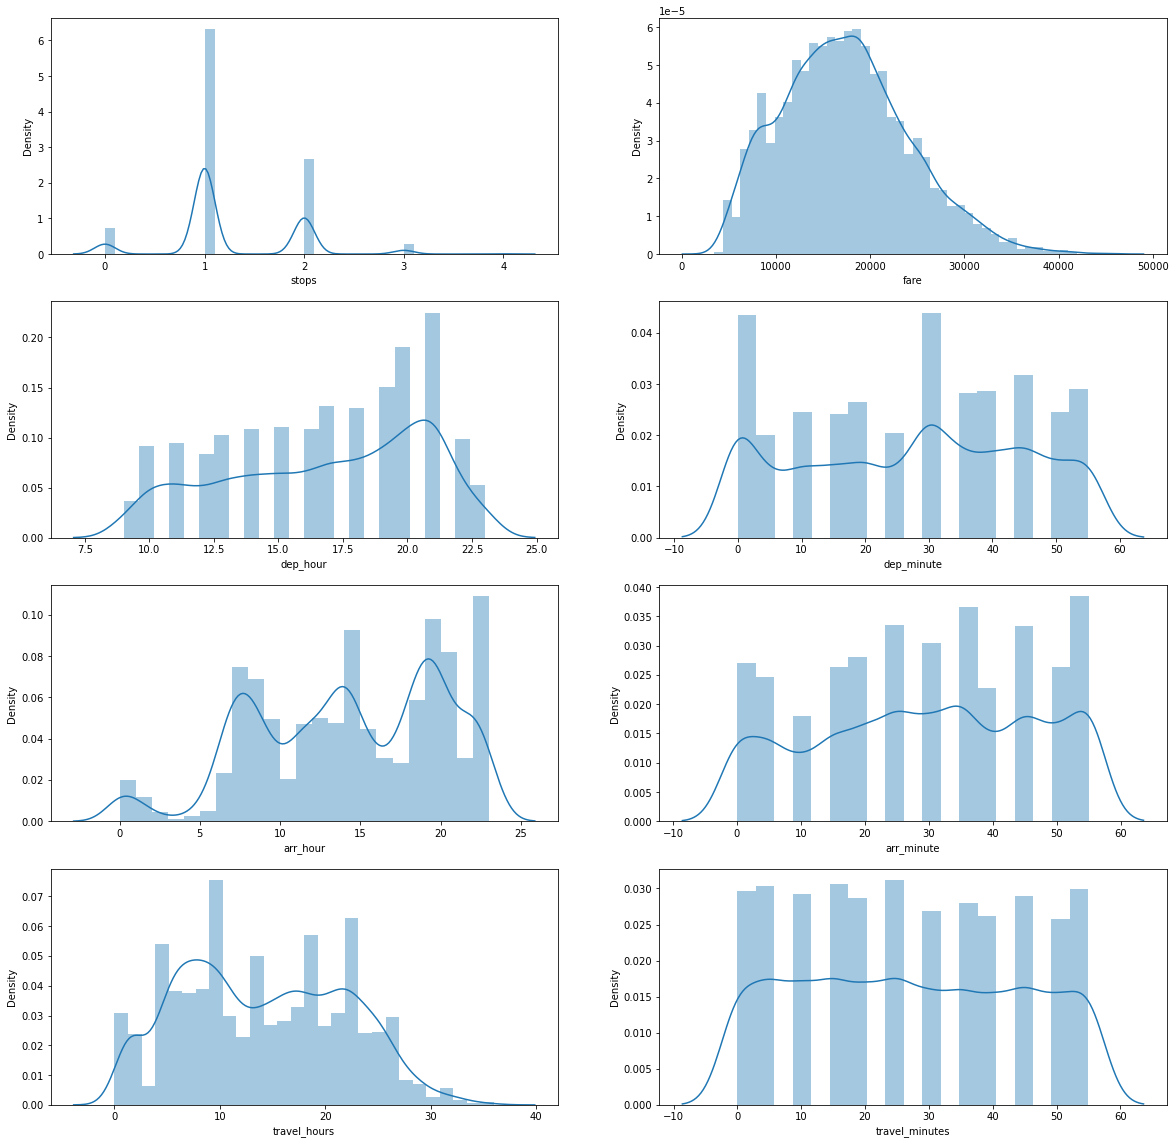

In [63]:
## Distribution of data :
plt.figure(figsize=(20,20))
graph = 1
for i in numerical_cols:
    if graph <= 8:
        plt.subplot(4,2,graph)
        sns.distplot(df[i] )
        plt.xlabel(i)
        graph += 1
        
plt.show()    

Distribution of data seems normal. There is not very much skewness present in data.

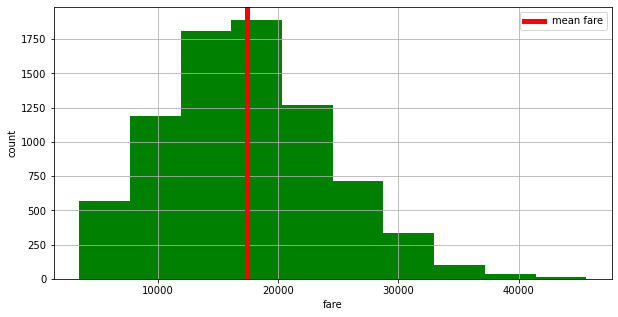

Statistical information of fare :
 count     7927.000000
mean     17363.793238
std       6795.318861
min       3435.000000
25%      12394.500000
50%      16971.000000
75%      21615.000000
max      45633.000000
Name: fare, dtype: float64


In [68]:
df.fare.hist(bins =10,figsize=(10,5), color ="green")
plt.axvline(np.mean(df.fare), linewidth = 5, color = "red", label = "mean fare")
plt.xlabel("fare")
plt.ylabel("count")
plt.legend()
plt.show()
print("Statistical information of fare :\n",\
      df.fare.describe())


-> Mean of the fare is 17363 rs.
-> Most of the fare ranges between 20000rs.


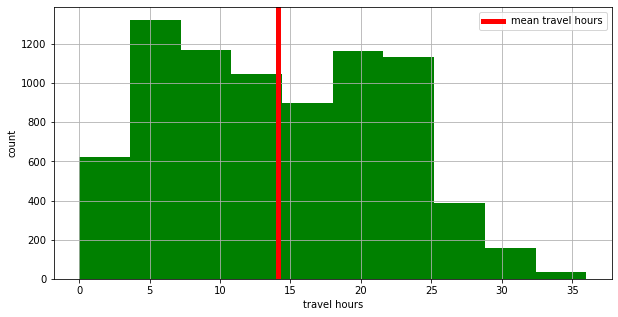

Statistical information of travel hours :
 count    7927.000000
mean       14.106219
std         7.781415
min         0.000000
25%         8.000000
50%        14.000000
75%        21.000000
max        36.000000
Name: travel_hours, dtype: float64


In [69]:
df.travel_hours.hist(bins =10,figsize=(10,5), color ="green")
plt.axvline(np.mean(df.travel_hours), linewidth = 5, color = "red", label = "mean travel hours")
plt.xlabel("travel hours")
plt.ylabel("count")
plt.legend()
plt.show()
print("Statistical information of travel hours :\n",\
      df.travel_hours.describe())


-> Means of travel hours are 14 hours.
-> Most of the travel hour ranges between 3 hours to 25 hours.

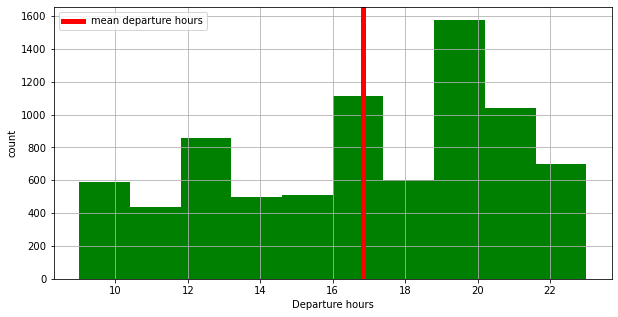

Statistical information of Departure hours :
 count    7927.000000
mean       16.838400
std         3.880501
min         9.000000
25%        14.000000
50%        17.000000
75%        20.000000
max        23.000000
Name: dep_hour, dtype: float64


In [70]:
df.dep_hour.hist(bins =10,figsize=(10,5), color ="green")
plt.axvline(np.mean(df.dep_hour), linewidth = 5, color = "red", label = "mean departure hours")
plt.xlabel("Departure hours")
plt.ylabel("count")
plt.legend()
plt.show()
print("Statistical information of Departure hours :\n",\
      df.dep_hour.describe())


-> Counts of flights between 7pm to 8 pm are more than other timings.
-> Most of flights timing ranges between 9am to 4:30 pm.

# Bi-Variate Analysis

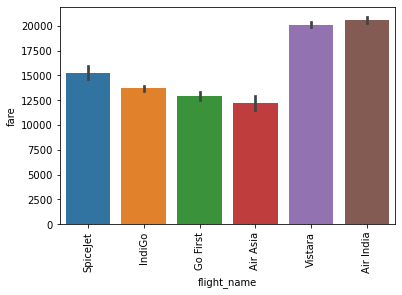

In [64]:
sns.barplot(x="flight_name",y="fare",data=df)
plt.xticks(rotation=90)
plt.show()


Air India flight's fares are costly followed by Vistara flights.

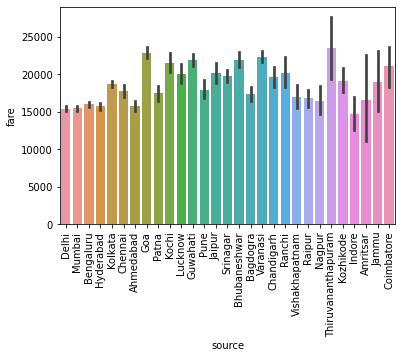

In [65]:
sns.barplot(x="source",y="fare",data=df)
plt.xticks(rotation=90)
plt.show()


From Goa,Thiruvananthpuram  as source ,fares  are high.

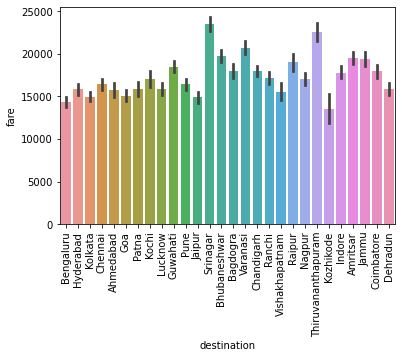

In [66]:
sns.barplot(x="destination",y="fare",data=df)
plt.xticks(rotation=90)
plt.show()


Bhubaneshwar and Thiruvananthpuram as destination,fares are high.

<AxesSubplot:xlabel='stops', ylabel='fare'>

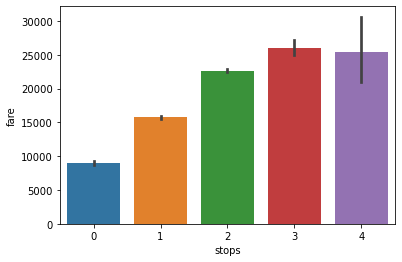

In [71]:
sns.barplot(x="stops",y="fare",data=df)

-> More stops ,higher fare.
-> fare is lowest for non stop flights.

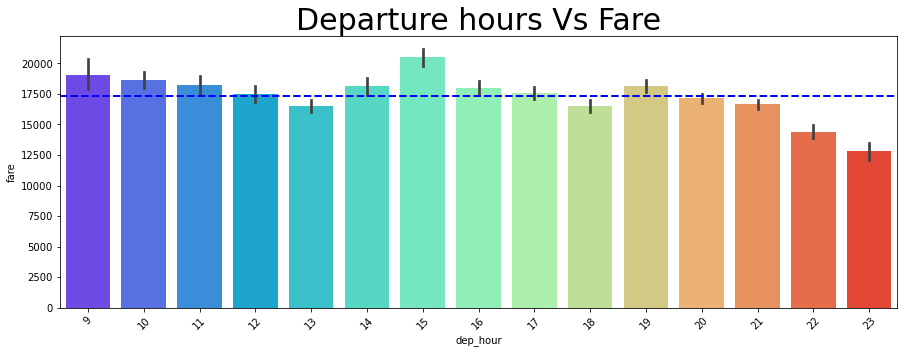

In [79]:
plt.figure(figsize=(15,5))
sns.barplot(x = "dep_hour",y = "fare", data = df, palette = "rainbow")
plt.axhline(np.mean(df.fare), color = "b", linestyle="dashed", linewidth=2)
plt.title("Departure hours Vs Fare", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

-> Late night, after 9pm flight's fare are cheaper.
-> Afternoon flights 2pm to 5pm ,fare is higher.

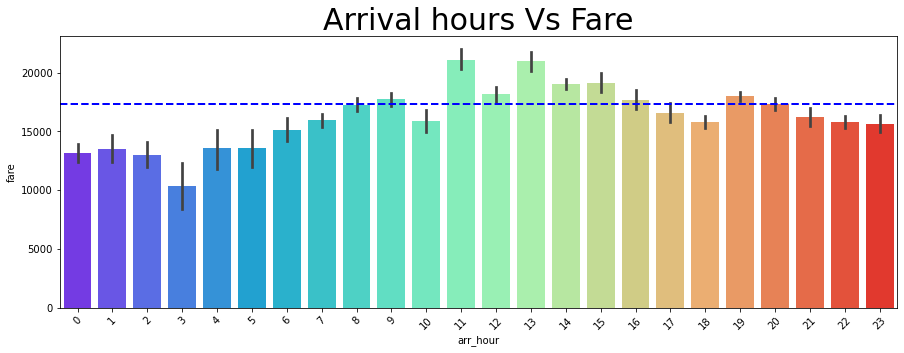

In [78]:
plt.figure(figsize=(15,5))
sns.barplot(x = "arr_hour",y = "fare", data = df, palette = "rainbow")
plt.axhline(np.mean(df.fare), color = "b", linestyle="dashed", linewidth=2)
plt.title("Arrival hours Vs Fare", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

-> Arriving flights at 11 am and 13 pm, those flight's fare are higher. 

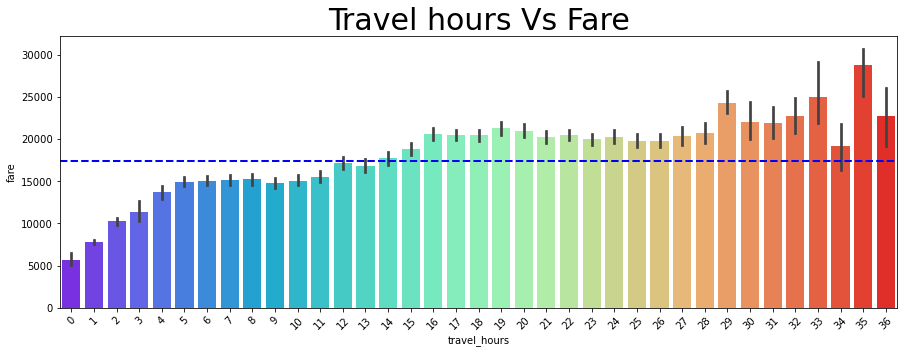

In [77]:
plt.figure(figsize=(15,5))
sns.barplot(x = "travel_hours",y = "fare", data = df, palette = "rainbow")
plt.axhline(np.mean(df.fare), color = "b", linestyle="dashed", linewidth=2)
plt.title("Travel hours Vs Fare", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

In [ ]:
-> As travel time increases, fare increases.

# Multivariate  Analysis

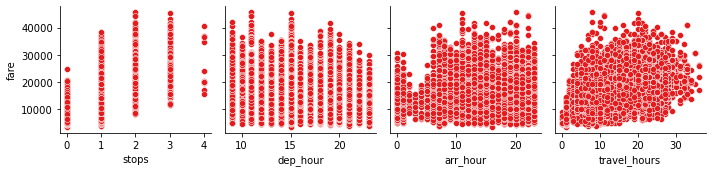

In [94]:
sns.pairplot(df,y_vars=['fare'],x_vars=['stops','dep_hour','arr_hour','travel_hours'],kind = 'scatter')

## Observations from Multivariate analysis:
-> stops and fare are in linear relationship.As stops increases ,Fare increases.
-> from non stop flights to flights having stops ,fare changes in large jumps.
-> before 9 am and after 8 pm ,fligh's fares are cheaper comparatively than after 10 am to 8 pm.


In [67]:
df.head()

,flight_name,flight_id,stops,fare,source,destination,dep_hour,dep_minute,arr_hour,arr_minute,travel_hours,travel_minutes
0,SpiceJet,SG - 534,0,8160,Delhi,Bengaluru,22,30,1,15,2,45
1,IndiGo,6E - 2036,0,8160,Delhi,Bengaluru,22,50,1,45,2,55
2,Go First,G8 - 275,1,8160,Delhi,Bengaluru,21,45,3,0,5,15
3,Go First,G8 - 2511,1,8160,Delhi,Bengaluru,10,45,16,5,5,20
4,Go First,G8 - 165,1,8160,Delhi,Bengaluru,10,0,16,5,6,5


# Label Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = [ i for i in df.columns if df[i].dtype==object]
lec = LabelEncoder()
for column in categorical_cols:
    df[column] = lec.fit_transform(df[column])
df

,flight_name,flight_id,stops,fare,source,destination,dep_hour,dep_minute,arr_hour,arr_minute,travel_hours,travel_minutes
0,4,968,0,8160,8,3,22,30,1,15,2,45
1,3,52,0,8160,8,3,22,50,1,45,2,55
2,2,782,1,8160,8,3,21,45,3,0,5,15
3,2,771,1,8160,8,3,10,45,16,5,5,20
4,2,739,1,8160,8,3,10,0,16,5,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
7922,1,641,2,19497,7,8,15,5,13,45,22,40
7923,1,659,2,24484,7,8,14,0,7,20,17,20
7924,1,659,2,24484,7,8,14,0,7,20,17,20
7925,1,641,2,24642,7,8,15,5,13,45,22,40


# Statistical Description

In [20]:
# Statistical Description
df.describe()

,flight_name,flight_id,stops,fare,source,destination,dep_hour,dep_minute,arr_hour,arr_minute,travel_hours,travel_minutes
count,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000
mean,3.008831,716.379967,1.251924,17363.793238,12.190110,12.841302,16.838400,27.367857,14.216475,29.330768,14.106219,27.001388
std,1.643674,329.640447,0.630608,6795.318861,7.278052,8.007175,3.880501,17.551357,5.746633,17.145254,7.781415,17.323505
min,0.000000,0.000000,0.000000,3435.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,529.000000,1.000000,12394.500000,6.000000,6.000000,14.000000,10.000000,9.000000,15.000000,8.000000,10.000000
50%,3.000000,702.000000,1.000000,16971.000000,11.000000,12.000000,17.000000,30.000000,14.000000,30.000000,14.000000,25.000000
75%,5.000000,1045.000000,2.000000,21615.000000,19.000000,20.000000,20.000000,40.000000,19.000000,45.000000,21.000000,40.000000
max,5.000000,1127.000000,4.000000,45633.000000,28.000000,27.000000,23.000000,55.000000,23.000000,55.000000,36.000000,55.000000


-> Minimum fare is 3435 rs and Max fare is 45633 rs.
-> maximum travel hour with in India is 36 hours.
-> Minimum stops is non stop and maximum stops is 4 stops.

# Correlation

In [21]:
df.corr()

,flight_name,flight_id,stops,fare,source,destination,dep_hour,dep_minute,arr_hour,arr_minute,travel_hours,travel_minutes
flight_name,1.000000,0.438299,-0.078588,0.093081,-0.016003,0.001516,0.039864,0.187353,0.044598,0.161740,0.092879,-0.018101
flight_id,0.438299,1.000000,0.241965,0.273256,-0.000501,-0.046042,0.181348,0.064392,-0.040193,0.139884,0.510406,-0.014647
stops,-0.078588,0.241965,1.000000,0.586993,0.087372,0.023585,0.007513,-0.128225,-0.006034,0.035491,0.620621,0.004022
fare,0.093081,0.273256,0.586993,1.000000,0.049843,0.055793,-0.133842,-0.135441,0.025819,0.045891,0.469762,-0.003991
source,-0.016003,-0.000501,0.087372,0.049843,1.000000,-0.014752,-0.130451,-0.043496,0.004060,-0.004526,0.035495,-0.014681
destination,0.001516,-0.046042,0.023585,0.055793,-0.014752,1.000000,0.007036,-0.003781,-0.052578,0.027063,0.000771,-0.018284
dep_hour,0.039864,0.181348,0.007513,-0.133842,-0.130451,0.007036,1.000000,0.036055,-0.267837,0.019642,0.085647,0.006060
dep_minute,0.187353,0.064392,-0.128225,-0.135441,-0.043496,-0.003781,0.036055,1.000000,-0.011869,0.026513,-0.065076,-0.025080
arr_hour,0.044598,-0.040193,-0.006034,0.025819,0.004060,-0.052578,-0.267837,-0.011869,1.000000,0.086888,0.068696,0.003492
arr_minute,0.161740,0.139884,0.035491,0.045891,-0.004526,0.027063,0.019642,0.026513,0.086888,1.000000,0.114780,-0.007724


<AxesSubplot:>

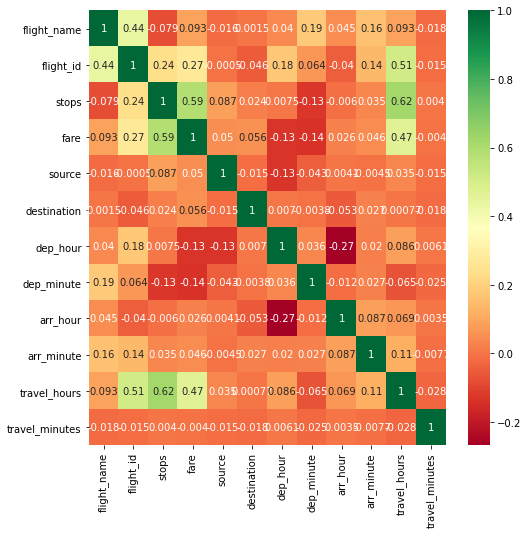

In [24]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),cmap = 'RdYlGn',annot = True)

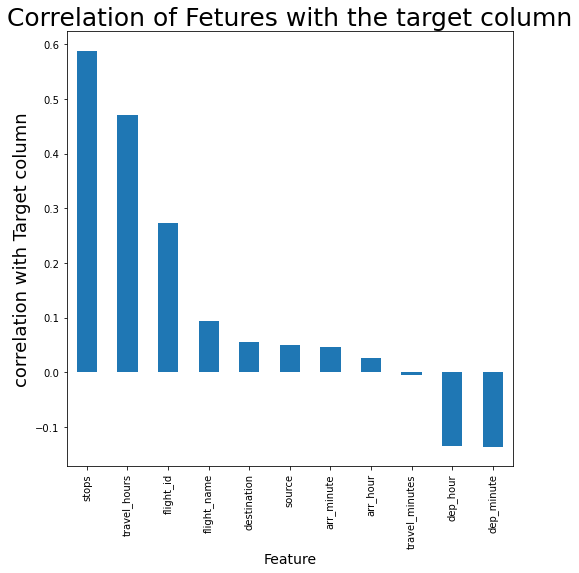

KEY OBSERVATIONS:
 


,fare
stops,0.586993
travel_hours,0.469762
flight_id,0.273256
flight_name,0.093081
destination,0.055793
source,0.049843
arr_minute,0.045891
arr_hour,0.025819
travel_minutes,-0.003991
dep_hour,-0.133842


In [25]:
plt.figure(figsize=(8,8))
df.corr()["fare"].sort_values(ascending=False).drop(["fare"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
corr=pd.DataFrame(df.corr()["fare"].sort_values(ascending=False)).drop(["fare"])
print("KEY OBSERVATIONS:\n ")
corr



-> Stops and travel_hours has good relationship with fare.
-> dep_hour and dep_minute is negatively correlated with fare.
-> travel_minutes is very much weakly negative correlation with fare.


# Outliers

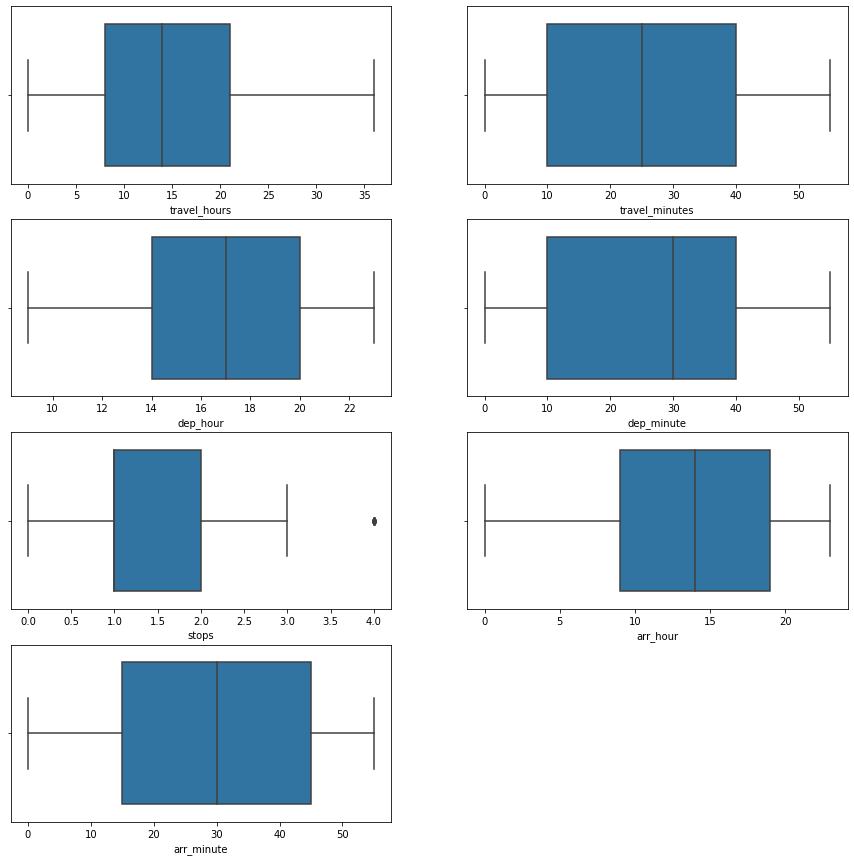

In [30]:
numerical_cols = ['travel_hours','travel_minutes','dep_hour','dep_minute','stops','arr_hour','arr_minute']
plt.figure(figsize=(15,15))
graph = 1
for i in numerical_cols:
    if graph <= 8:
        plt.subplot(4,2,graph)
        sns.boxplot(df[i])
        plt.xlabel(i)
        graph += 1
        
plt.show()    

There is not any outliers present in our dataset.

# Skewness

In [31]:
df.skew()

flight_name      -0.115077
flight_id        -0.520805
stops             0.536524
fare              0.452229
source            0.112342
destination       0.143701
dep_hour         -0.344238
dep_minute       -0.086202
arr_hour         -0.371397
arr_minute       -0.128821
travel_hours      0.166463
travel_minutes    0.054998
dtype: float64

All values are in +/- 0.5 range. Data are almost normally distributed for each column's data.

# Separating Features and Target

In [69]:
y = df['fare']
x = df.drop('fare',axis =1)

In [70]:
x.shape

(7927, 11)

In [71]:
y.shape

(7927,)

# Standardization

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,flight_name,flight_id,stops,source,destination,dep_hour,dep_minute,arr_hour,arr_minute,travel_hours,travel_minutes
0,0.603059,0.763365,-1.985389,-0.575755,-1.229138,1.330221,0.149978,-2.300009,-0.835897,-1.555885,1.039036
1,-0.005373,-2.015596,-1.985389,-0.575755,-1.229138,1.330221,1.289562,-2.300009,0.913968,-1.555885,1.616323
2,-0.613804,0.199078,-0.399518,-0.575755,-1.229138,1.072506,1.004666,-1.951958,-1.710830,-1.170326,-0.692824
3,-0.613804,0.165706,-0.399518,-0.575755,-1.229138,-1.762358,1.004666,0.310380,-1.419186,-1.170326,-0.404181
4,-0.613804,0.068625,-0.399518,-0.575755,-1.229138,-1.762358,-1.559400,0.310380,-1.419186,-1.041807,-1.270111
...,...,...,...,...,...,...,...,...,...,...,...
7922,-1.222236,-0.228688,1.186352,-0.713163,-0.604659,-0.473783,-1.274504,-0.211698,0.913968,1.014504,0.750393
7923,-1.222236,-0.174079,1.186352,-0.713163,-0.604659,-0.731498,-1.559400,-1.255854,-0.544253,0.371907,-0.404181
7924,-1.222236,-0.174079,1.186352,-0.713163,-0.604659,-0.731498,-1.559400,-1.255854,-0.544253,0.371907,-0.404181
7925,-1.222236,-0.228688,1.186352,-0.713163,-0.604659,-0.473783,-1.274504,-0.211698,0.913968,1.014504,0.750393


# Checking for Multicollinearity Problem using VIF:- 

In [73]:
# Checking for Multicollinearity Problem using VIF:- 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif


,VIF values,Features
0,1.358905,flight_name
1,1.779279,flight_id
2,1.715293,stops
3,1.028012,source
4,1.009951,destination
5,1.139554,dep_hour
6,1.053786,dep_minute
7,1.115166,arr_hour
8,1.046829,arr_minute
9,2.157294,travel_hours


All values are less than 5, So now proceed to model building part.

# Building the model

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score


# Finding the best random state

In [78]:
max_r2_score=0
for r_state in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    score=r2_score(y_test,y_pred)
    if score > max_r2_score:
        max_r2_score = score
        final_r_state = r_state
print("max r2 score corresponding to",final_r_state,"is",max_r2_score)

max r2 score corresponding to 140 is 0.7801605384745995


In [79]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.30)

In [80]:
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rf = RandomForestRegressor()
adb = AdaBoostRegressor()
gbr =GradientBoostingRegressor()

In [84]:
models= []
models.append(('Linear Regression',lr))
models.append(('Lasso Regression',lasso))
models.append(('Random Forest Regression',rf))
models.append(('Ridge Regression',ridge))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))
models.append(('AdaBoost Regressor',adb))
models.append(('GradientBoostingRegressor',gbr))


# Scores,Cross Validation of Models

In [86]:
Model=[]
score=[]
cvs=[]
sd=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    S=r2_score(y_test,pred)
    print('r2_score: ',S)
    score.append(S*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=3,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=3,scoring='r2').std()
    print('Standard Deviation: ',std)
    sd.append(std)
    print('\n')
    MAE=mean_absolute_error(y_test,pred)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pred)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')



LinearRegression()


r2_score:  0.42416811880239325


cross_val_score:  0.27835446026139177


Standard Deviation:  0.09117471961363585


Mean Absolute Error:  4097.907874363057


Mean Squared Error:  27349349.47326085


Root Mean Squared Error:  5229.660550481345





Lasso()


r2_score:  0.4241774474590886


cross_val_score:  0.27844745835514617


Standard Deviation:  0.0911638254063981


Mean Absolute Error:  4097.901137079694


Mean Squared Error:  27348906.40523977


Root Mean Squared Error:  5229.618189240948





RandomForestRegressor()


r2_score:  0.7579560052204081


cross_val_score:  0.29018169428104074


Standard Deviation:  0.09788259656434918


Mean Absolute Error:  2445.574383672904


Mean Squared Error:  11495969.60029989


Root Mean Squared Error:  3390.5706894710056





Ridge()


r2_score:  0.42415958138869947


cross_val_score:  0.2783624849541507


Standard Deviation:  0.09118483528295203


Mean Absolute Error:  4097.943777203356


Mean Squared Error:  27349754.96

In [87]:
#making dataframe for results got from model:
result_df=pd.DataFrame({'Model':Model, 'r2_score': score, 'Cross_val_score':cvs, 'Standard_deviation':sd,
                    'Mean_absolute_error':mae, 'Mean_squared_error':mse, 'Root_Mean_Squared_error':rmse})
result_df

,Model,r2_score,Cross_val_score,Standard_deviation,Mean_absolute_error,Mean_squared_error,Root_Mean_Squared_error
0,Linear Regression,42.416812,27.835446,0.091175,4097.907874,2.734935e+07,5229.660550
1,Lasso Regression,42.417745,27.844746,0.091164,4097.901137,2.734891e+07,5229.618189
2,Random Forest Regression,75.795601,29.018169,0.097883,2445.574384,1.149597e+07,3390.570689
3,Ridge Regression,42.415958,27.836248,0.091185,4097.943777,2.734975e+07,5229.699318
4,Support Vector Regressor,1.828862,-13.691379,0.115587,5406.865975,4.662675e+07,6828.378093
5,Decision Tree Regressor,50.620136,-20.376173,0.208469,3241.106476,2.345315e+07,4842.845237
6,KNeighbors Regressor,53.747635,19.609193,0.132986,3545.472047,2.196773e+07,4686.974830
7,AdaBoost Regressor,42.134575,14.998432,0.144394,4285.922054,2.748340e+07,5242.461134
8,GradientBoostingRegressor,64.667397,32.541350,0.064557,3136.757898,1.678135e+07,4096.504752


 Highest R2 score is given by RandomForest Model. So I'll do Hyperparameter tuning for Random Forest.

# Hyperparameter Tuning

In [91]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100,200],
          'criterion' : ["mse","mae"],
          'max_depth' : range(2,6),
          'min_samples_split' : range(2,4),
          'min_samples_leaf':range(2,7)

          
         }
rfr = RandomForestRegressor()
clf  = GridSearchCV(rfr,params,cv=5,scoring ='r2')
clf.fit(x_train,y_train)
print(clf.best_params_)  #Printing the best parameters obtained
print(clf.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 200}
0.5142157070993991


In [94]:
## Providing best parameters to the model
rfr=RandomForestRegressor(criterion='mse', max_depth = 5,min_samples_leaf=5, n_estimators=200)
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print(' r2_score after tuning is: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(rfr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(rfr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))    

 r2_score after tuning is:  51.783430839632196
Cross validation score:  37.74623969520878
Standard deviation:  0.08268145591210468


Mean absolute error:  3688.358015637489
Mean squared error:  22900638.943886787
Root Mean squared error:  4785.461204929655


So from we can see Random Forest is working better with default parameters.

# Saving the model

In [95]:
import pickle
filename = 'flight_price_prediction.pickle'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [96]:
a = np.array(y_test)
predicted = np.array(rf.predict(x_test))
result_df = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
result_df


,Original,Predicted
0,15668,12648.780000
1,35351,34497.790000
2,14107,9052.630000
3,32646,28982.890000
4,6658,20751.440000
...,...,...
2374,17105,18739.217667
2375,10943,13170.700000
2376,16077,16386.470000
2377,14616,15705.730000


Most No of Flights are available from Mumbai.
Among  Vistara, Air India, Indigo, Go First, Air Asia, SpiceJet flights, Air India flights are most expensive followed by Vistara flights.
Non Stop Flights are cheaper than flights including stops.
As Travel Hour increases, Fare Increases. 
Vistara flights availability is more than any other airlines for different places.
Evening flights availability is more than morning flights.
Early morning and late nights flights are cheaper.

